In [1]:
from point import Point
from squareLattice import SquareLattice
from simulator import Simulator
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lattice_big = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 341569.94it/s]


In [4]:
simulator_big = Simulator(lattice_big, sqr = 0)

100%|██████████| 15625/15625 [00:00<00:00, 293246.94it/s]


In [5]:
stats = simulator_big.step(3000000, 1000000)

  0%|          | 0/3000000 [00:00<?, ?it/s]

100%|██████████| 3000000/3000000 [8:23:43<00:00, 99.26it/s]     


In [6]:
ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = stats

In [7]:
ret

[244399, 190545, 46118, 3589, 3431, 0]

In [8]:
sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2)

(14140.4173555, 63.5826445, 1405.424925, 15.4098635, 0.1652115)

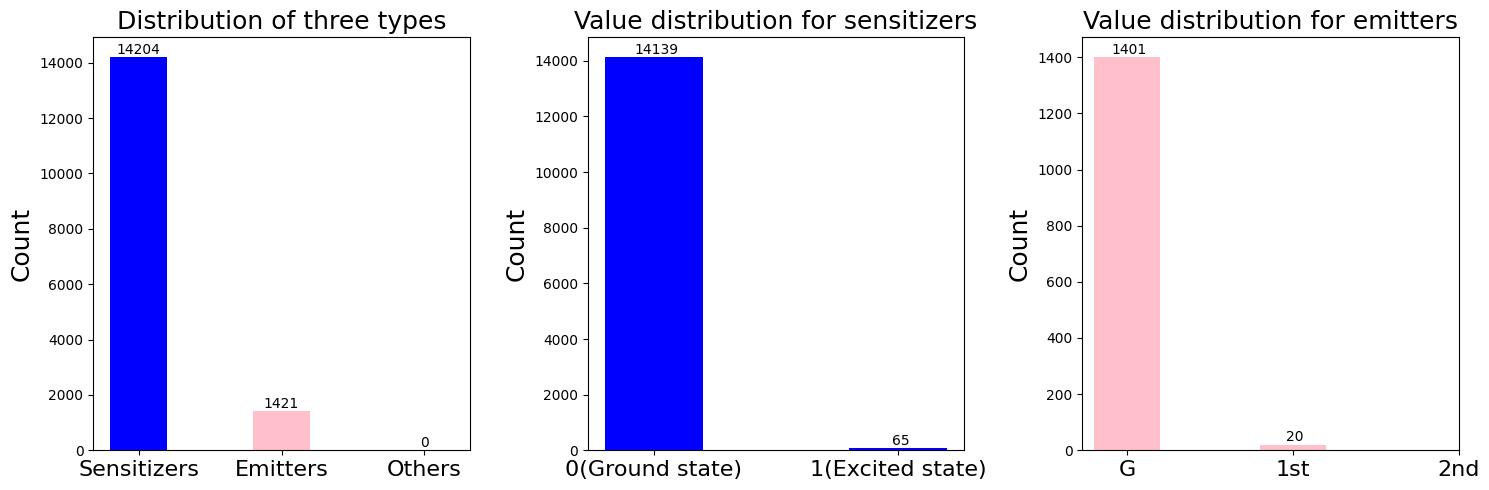

In [9]:
simulator_big.lattice.plot_distributions()

In [4]:
tag_default={'S1S0':100000, # energy transfer
     'c1':2.5*10**4,'c2':3.2*10**3, # upconversion
     'Ws':1000, # decay of sensitizer
     'W10':1000, 'W20':7000, # decay of activator
     'A1S0': 10000, # activator transfer energy back to sensitizer
     'A1A0': 5000, 'A1A1':600, # activator cross relaxation 
     'laser': 5.76*10**(-6)} # 100W

In [5]:
lattice_power = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 557056.28it/s]


In [6]:
uc_intensities = []
for w in [1, 2, 3, 4, 5, 6, 7, 8]:
    tag_new = tag_default.copy()
    tag_new['laser'] = tag_default['laser']/4*w
    simulator_power = Simulator(lattice_power, tag =tag_new)
    ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = simulator_power.step(100000, 20000)
    uc_intensities.append(ret[4])
    print(w, ret)
    print(sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2))

100%|██████████| 100000/100000 [20:34<00:00, 80.99it/s]


1 [2043, 1685, 407, 6, 6, 0]
14186.8994625 17.1005375 1416.8418 4.149425 0.008775


100%|██████████| 100000/100000 [09:23<00:00, 177.35it/s]


2 [4150, 3342, 764, 36, 34, 0]
14172.2689625 31.7310375 1413.2793125 7.675025 0.0456625


100%|██████████| 100000/100000 [09:41<00:00, 172.11it/s]


3 [6196, 4923, 1163, 62, 59, 0]
14154.800775 49.199225 1409.038875 11.8785625 0.0825625


100%|██████████| 100000/100000 [09:39<00:00, 172.68it/s]


4 [8030, 6209, 1566, 122, 115, 0]
14141.750475 62.249525 1405.611925 15.2268125 0.1612625


100%|██████████| 100000/100000 [09:33<00:00, 174.47it/s]


5 [10140, 7818, 1902, 188, 175, 0]
14125.0649375 78.9350625 1401.6765125 19.0474875 0.276


100%|██████████| 100000/100000 [11:18<00:00, 147.45it/s]


6 [12138, 9364, 2248, 218, 209, 0]
14112.6512875 91.3487125 1398.6433125 22.039825 0.3168625


100%|██████████| 100000/100000 [17:57<00:00, 92.83it/s]


7 [14182, 10835, 2622, 317, 302, 0]
14094.9630625 109.0369375 1394.0976125 26.4911125 0.411275


100%|██████████| 100000/100000 [18:10<00:00, 91.69it/s]

8 [16357, 12314, 2959, 470, 447, 0]
14079.7614875 124.2385125 1390.365375 29.95135 0.683275


In [7]:
uc_intensities

[6, 34, 59, 115, 175, 209, 302, 447]

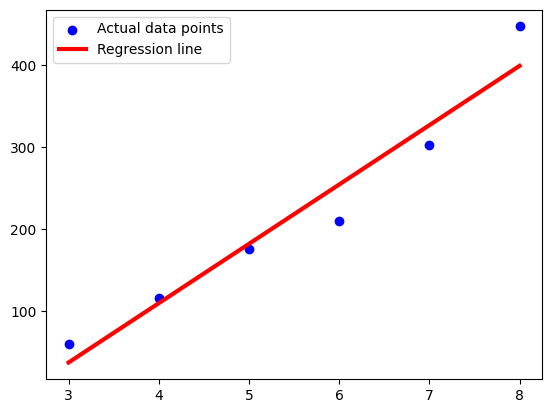

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.array([3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = uc_intensities[2:]
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color='blue', label='Actual data points')
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red', linewidth=3, label='Regression line')
plt.legend()
plt.show()

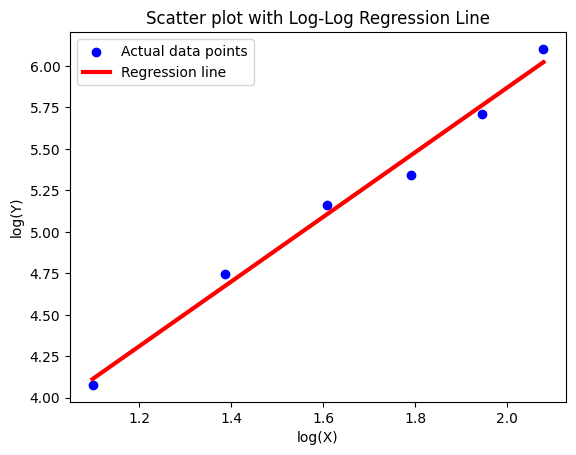

In [9]:
log_x = np.log(x)
log_y = np.log(y)

model = LinearRegression()
model.fit(log_x, log_y)

# Scatter plot of the log-transformed data points
plt.scatter(log_x, log_y, color='blue', label='Actual data points')

# Predict on the log-transformed x values
log_y_pred = model.predict(log_x)

# Plot the regression line on the log-transformed scale
plt.plot(log_x, log_y_pred, color='red', linewidth=3, label='Regression line')

# Add labels and legend
plt.xlabel('log(X)')
plt.ylabel('log(Y)')
plt.title('Scatter plot with Log-Log Regression Line')
plt.legend()

# Show the plot
plt.show()